# 벡터의 표현

In [1]:
from sympy import Matrix

# row vector
Matrix(1,4,[1,2,3,4])

Matrix([[1, 2, 3, 4]])

In [2]:
# column vector
Matrix(4,1,[1,2,3,4])

Matrix([
[1],
[2],
[3],
[4]])

In [3]:
# 벡터의 전치
_.transpose()

Matrix([[1, 2, 3, 4]])

### 두 벡터 A=(1,2,3), B=(-2,3,-1)에 대해서 내적 A∙B 를 구하고, 두 벡터의 사이각을 구하여라.

In [25]:
from sympy import Matrix

A=Matrix(1,3,[1,2,3])
A.norm() # A 벡터의 크기

sqrt(14)

In [26]:
# 벡터의 내적
B=Matrix(1,3,[-2,3,-1])
A.dot(B)

1

In [27]:
# 벡터의 내적 2
A@B.transpose()

Matrix([[1]])

In [28]:
# 두 벡터의 사잇각 구하기
from sympy import deg, acos
C_t=A.dot(B)/(A.norm()*B.norm())
# radian을 degree로 표현
deg(acos(C_t)).evalf() 

85.9039562418477

In [29]:
# A벡터를 B벡터로 정사영시킨 벡터 BA
BA=(A.dot(B))/(B.dot(B))*B
BA

Matrix([[-1/7, 3/14, -1/14]])

## 	두 벡터 A=(1,2,3), B=(-2,3,-1)에 대해서 외적 A×B를 구하여라.

In [12]:
## 벡터의 외적
A=Matrix(1,3,[1,2,3])
B=Matrix(1,3,[-2,3,-1])
O1=A.cross(B)
O1

Matrix([[-11, -5, 7]])

In [14]:
# 외적 벡터의 크기 검증
from sympy import acos,sin
C_t=A.dot(B)/(A.norm()*B.norm())
r=acos(C_t) # 두벡터의 사이각
O1.norm()-A.norm()*B.norm()*sin(r)

0

# 행렬의 정의와 표현

In [1]:
from sympy import Matrix
import numpy as np

# 1부터 9까지의 정수 난수 6개 생성
np.random.seed(1) # 난수 seed 고정
D=np.random.randint(1,10,6)

A=Matrix(2,3,D)
A

Matrix([
[6, 9, 6],
[1, 1, 2]])

In [2]:
A[0,1]

9

In [3]:
# 데이터 타입 확인
type(D)

numpy.ndarray

In [4]:
np.array([[6,9,6],[1,1,2]])

array([[6, 9, 6],
       [1, 1, 2]])

In [5]:
Matrix(_)

Matrix([
[6, 9, 6],
[1, 1, 2]])

In [31]:
# 전치행렬
At=A.transpose()
At

Matrix([
[6, 1],
[9, 1],
[6, 2]])

In [32]:
A.T

Matrix([
[6, 1],
[9, 1],
[6, 2]])

## (행렬의 곱) -5부터 5까지의 정수의 난수로 작성된 4 by 4 행렬 A,B를 작성하고 두 행렬의 곱 AB를 구하여라.

In [15]:
import numpy as np
np.random.seed(10)
A=np.random.randint(-5,6,size=(4,4))
B=np.random.randint(-5,6,size=(4,4))

In [16]:
Matrix(A)

Matrix([
[4, -1, -5, -4],
[4, -5, -4,  5],
[3,  4, -5,  5],
[3,  1, -1, -2]])

In [17]:
Matrix(B)

Matrix([
[-5, -1, 1,  3],
[ 5, -4, 3, -1],
[-4, -2, 1,  0],
[-2,  4, 1,  4]])

In [18]:
# 두 행렬의 곱
Matrix(A@B)

Matrix([
[  3,  -6,  -8, -3],
[-39,  44, -10, 37],
[ 15,  11,  15, 25],
[ -2, -13,   3,  0]])

In [19]:
# 같은 위치의 원소의 곱
Matrix(A*B)

Matrix([
[-20,  1,  -5, -12],
[ 20, 20, -12,  -5],
[-12, -8,  -5,   0],
[ -6,  4,  -1,  -8]])

In [20]:
# AB와 BA는 다르다
Matrix(B@A)

Matrix([
[-12,  17,  21,  14],
[ 10,  26, -23, -23],
[-21,  18,  23,  11],
[ 23, -10, -15,  25]])

## 정방행렬, 단위행렬, 역행렬

In [12]:
# 단위행렬의 예
from sympy import eye

eye(4)

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [15]:
A=Matrix(2,2,[1,2,3,4])
A

Matrix([
[1, 2],
[3, 4]])

In [17]:
# A의 역행렬
X=A.inv()
X

Matrix([
[ -2,    1],
[3/2, -1/2]])

In [18]:
A@X

Matrix([
[1, 0],
[0, 1]])

In [19]:
X@A

Matrix([
[1, 0],
[0, 1]])

### 	두 행렬 A(m×n),B(n×p)의 곱에 대한 전치행렬에 대해 아래의 관계가 성립하는 것을 보여라. $ (AB)^T= B^T A^T $


In [33]:
import sympy as sp

m,n,p=sp.symbols('m n p',integer=True, positive=True)
# 행렬 변수 정의
A = sp.MatrixSymbol('A', m, n)  # A is a mxn matrix
B = sp.MatrixSymbol('B', n, p)  # B is a nxp matrix

# (AB)^T 계산
AB = A * B
AB_T = AB.T

# B^T * A^T 계산
BT_AT = B.T * A.T

# 결과 비교
proof = sp.simplify(AB_T - BT_AT)  # 두 결과가 동일한지 확인

# 결과 출력
print(f"(AB)^T: {AB_T}")
print(f"B^T * A^T: {BT_AT}")
print(f"Difference (should be zero matrix): {proof}")

(AB)^T: B.T*A.T
B^T * A^T: B.T*A.T
Difference (should be zero matrix): 0


### D(m×m)의 대각원소를 제외한 모든 원소가 0이라면 D를 대각행렬(diagonal matrix)이라고 부른다. $ D^n $은 각 대각원소의 n제곱으로 이루어짐을 보여라

In [21]:
import sympy as sp

# 대각행렬의 표현
D=sp.diag(1,2,3)
D

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

In [22]:
n=sp.symbols('n',integer=True, positive=True)
D.pow(n) # 행렬의 n제곱

Matrix([
[1,    0,    0],
[0, 2**n,    0],
[0,    0, 3**n]])

In [23]:
# numpy에서 행렬의 거듭제곱
import numpy as np

A1=np.array([[1,2],[3,4]])
sp.Matrix(A1**2) # 각 원소를 거듭제곱한다.

Matrix([
[1,  4],
[9, 16]])

In [24]:
sp.Matrix(np.linalg.matrix_power(A1,2))

Matrix([
[ 7, 10],
[15, 22]])

In [25]:
sp.Matrix(A1@A1)

Matrix([
[ 7, 10],
[15, 22]])

### 아래 행렬 A,P에 대하여 PA와 AP의 결과를 비교하여 보고, P의 역할에 대해 생각해 보아라

In [45]:
import numpy as np
import sympy as sp
d=np.arange(1,10).reshape(3,3)
A=sp.Matrix(d)
A

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [44]:
# 단위 행렬을 만들어 순서를 바꿈
P=sp.eye(3).permute_rows([1, 0, 2])
sp.Matrix(P)

Matrix([
[0, 1, 0],
[1, 0, 0],
[0, 0, 1]])

In [46]:
# A 행렬의 왼쪽에 곱하면 
# A 행렬의 row 연산에 관여
P@A

Matrix([
[4, 5, 6],
[1, 2, 3],
[7, 8, 9]])

In [48]:
# A 행렬의 오른쪽에 곱하면 
# A 행렬의 column 연산에 관여
A@P

Matrix([
[2, 1, 3],
[5, 4, 6],
[8, 7, 9]])

## Elmentary Matrix

In [1]:
import numpy as np
from sympy import Matrix

A=Matrix(3,3,[2,2,4,8,-4,8,-4,8,16])
A

Matrix([
[ 2,  2,  4],
[ 8, -4,  8],
[-4,  8, 16]])

In [2]:
E=Matrix(3,3,[0.5,0,0,0,1,0,0,0,1])
E

Matrix([
[0.5, 0, 0],
[  0, 1, 0],
[  0, 0, 1]])

In [4]:
EA=E@A
EA

Matrix([
[1.0, 1.0, 2.0],
[  8,  -4,   8],
[ -4,   8,  16]])

In [5]:
E1=Matrix(3,3,[1,0,0,-8,1,0,0,0,1])
E1

Matrix([
[ 1, 0, 0],
[-8, 1, 0],
[ 0, 0, 1]])

In [6]:
E1@EA

Matrix([
[1.0,   1.0,  2.0],
[  0, -12.0, -8.0],
[ -4,     8,   16]])

In [7]:
E2=Matrix(3,3,[1,0,0,0,1,0,4,0,1])
E2

Matrix([
[1, 0, 0],
[0, 1, 0],
[4, 0, 1]])

In [8]:
E2@E1@EA

Matrix([
[1.0,   1.0,  2.0],
[  0, -12.0, -8.0],
[  0,  12.0, 24.0]])

In [10]:
E3=Matrix(3,3,[1,0,0,0,-1/12,0,0,0,1])
E3

Matrix([
[1,                   0, 0],
[0, -0.0833333333333333, 0],
[0,                   0, 1]])

In [11]:
E3@E2@E1@EA

Matrix([
[1.0,  1.0,               2.0],
[  0,  1.0, 0.666666666666667],
[  0, 12.0,              24.0]])

In [12]:
E4=Matrix(3,3,[1,-1,0,0,1,0,0,0,1])
E4

Matrix([
[1, -1, 0],
[0,  1, 0],
[0,  0, 1]])

In [13]:
E4@E3@E2@E1@EA

Matrix([
[1.0, 5.55111512312578e-17,  1.33333333333333],
[  0,                  1.0, 0.666666666666667],
[  0,                 12.0,              24.0]])

In [14]:
E5=Matrix(3,3,[1,0,0,0,1,0,0,-12,1])
E5

Matrix([
[1,   0, 0],
[0,   1, 0],
[0, -12, 1]])

In [15]:
E5@E4@E3@E2@E1@EA

Matrix([
[1.0, 5.55111512312578e-17,  1.33333333333333],
[  0,                  1.0, 0.666666666666667],
[  0,                    0,                16]])

In [16]:
E6=Matrix(3,3,[1,0,0,0,1,0,0,0,1/16])
E6

Matrix([
[1, 0,      0],
[0, 1,      0],
[0, 0, 0.0625]])

In [17]:
E6@E5@E4@E3@E2@E1@EA

Matrix([
[1.0, 5.55111512312578e-17,  1.33333333333333],
[  0,                  1.0, 0.666666666666667],
[  0,                    0,               1.0]])

In [18]:
E7=Matrix(3,3,[1,0,-4/3,0,1,0,0,0,1])
E7

Matrix([
[1, 0, -1.33333333333333],
[0, 1,                 0],
[0, 0,                 1]])

In [19]:
E7@E6@E5@E4@E3@E2@E1@EA

Matrix([
[1.0, 1.11022302462516e-16, 2.22044604925031e-16],
[  0,                  1.0,    0.666666666666667],
[  0,                    0,                  1.0]])

In [20]:
E8=Matrix(3,3,[1,0,0,0,1,-2/3,0,0,1])
E8

Matrix([
[1, 0,                  0],
[0, 1, -0.666666666666667],
[0, 0,                  1]])

In [23]:
E8@E7@E6@E5@E4@E3@E2@E1@EA

Matrix([
[                 1.0, 1.11022302462516e-16, 2.22044604925031e-16],
[2.77555756156289e-17,                  1.0, 1.11022302462516e-16],
[                   0,                    0,                  1.0]])

In [2]:
# 삼각함수의 덧셈공식
from sympy import symbols,cos
t1,t2=symbols('θ_1 θ_2')
cos(t1+t2).expand(trig=True)

-sin(θ_1)*sin(θ_2) + cos(θ_1)*cos(θ_2)

In [3]:
from sympy import sin,tan

sin(t1+t2).expand(trig=True)

sin(θ_1)*cos(θ_2) + sin(θ_2)*cos(θ_1)

In [6]:
tan(t1+t2).expand(trig=True).simplify()

-(tan(θ_1) + tan(θ_2))/(tan(θ_1)*tan(θ_2) - 1)

In [8]:
# 행렬의 trace
import numpy as np
from sympy import Matrix

A=np.random.randint(0,9,size=9)
A=Matrix(A.reshape(3,3))
A

Matrix([
[7, 6, 7],
[2, 0, 4],
[3, 4, 3]])

In [9]:
A.trace()

10

# 행렬식

In [26]:
from sympy.combinatorics import Permutation

# 순열 생성
perm = Permutation([1, 0, 2])

# 순열의 부호 계산
permutation_sign = perm.signature()

print("순열의 부호:", permutation_sign)

순열의 부호: -1


### 'CAB' 문자열에 대한 sign 값 생성

In [42]:
# 알파벳 문자열과 대응하는 정수 리스트 생성
L = 'ABC'
mapping = {char: idx for idx, char in enumerate(L)}
mapping

{'A': 0, 'B': 1, 'C': 2}

In [37]:
# 문자열에 대한 정수 순열로 변환
perm_str = 'CAB'
perm_int = [mapping[char] for char in perm_str]

# 순열의 부호 계산
permutation = Permutation(perm_int)
permutation_sign = permutation.signature()

print("CAB 순열의 부호:", permutation_sign)

CAB 순열의 부호: 1


In [5]:
# Permutations() 이해
L = 'ABC'
import itertools
for perm in itertools.permutations(L):
    print(perm)

('A', 'B', 'C')
('A', 'C', 'B')
('B', 'A', 'C')
('B', 'C', 'A')
('C', 'A', 'B')
('C', 'B', 'A')


### '35142'의 sign 값을 구하여라. 

In [36]:
from sympy.combinatorics import Permutation

# 직접 0-based index로 변환 후 Permutation 객체 생성
perm = Permutation([x - 1 for x in [3, 5, 1, 4, 2]])

# 순열의 부호 계산
perm.signature()

1

### ‘ABCD’ 문자조합에 대해 가능한 모든 순열 조합을 생성하고, 각 조합에 대한 sgn()값을 출력해 보아라. 

In [40]:
import itertools
from sympy.combinatorics import Permutation

# 리스트 정의
L = 'ABCD'

# 모든 순열 생성
for perm in itertools.permutations(L):
    perm_list = list(perm)  # 튜플을 리스트로 변환

    # 1-based index를 0-based index로 변환 (A=1 → 0, B=2 → 1, C=3 → 2)
    # ord() 문자 유니코드 포인트값 반환, 각 문자를 ord('A')로 차감
    perm_indices = [ord(c) - ord('A') for c in perm_list]

    # Permutation 객체 생성 후 부호 계산
    perm_obj = Permutation(perm_indices)
    sign_value = perm_obj.signature()

    # 결과 출력
    print(f"순열: {perm}, sign: {sign_value}")

순열: ('A', 'B', 'C', 'D'), sign: 1
순열: ('A', 'B', 'D', 'C'), sign: -1
순열: ('A', 'C', 'B', 'D'), sign: -1
순열: ('A', 'C', 'D', 'B'), sign: 1
순열: ('A', 'D', 'B', 'C'), sign: 1
순열: ('A', 'D', 'C', 'B'), sign: -1
순열: ('B', 'A', 'C', 'D'), sign: -1
순열: ('B', 'A', 'D', 'C'), sign: 1
순열: ('B', 'C', 'A', 'D'), sign: 1
순열: ('B', 'C', 'D', 'A'), sign: -1
순열: ('B', 'D', 'A', 'C'), sign: -1
순열: ('B', 'D', 'C', 'A'), sign: 1
순열: ('C', 'A', 'B', 'D'), sign: 1
순열: ('C', 'A', 'D', 'B'), sign: -1
순열: ('C', 'B', 'A', 'D'), sign: -1
순열: ('C', 'B', 'D', 'A'), sign: 1
순열: ('C', 'D', 'A', 'B'), sign: 1
순열: ('C', 'D', 'B', 'A'), sign: -1
순열: ('D', 'A', 'B', 'C'), sign: -1
순열: ('D', 'A', 'C', 'B'), sign: 1
순열: ('D', 'B', 'A', 'C'), sign: 1
순열: ('D', 'B', 'C', 'A'), sign: -1
순열: ('D', 'C', 'A', 'B'), sign: -1
순열: ('D', 'C', 'B', 'A'), sign: 1


### 아래의 행렬 A에 대하여 위 정의에 의한 행렬식의 값을 구하여라

In [43]:
from sympy import Matrix
A=Matrix(3,3,[1,2,3,4,5,6,7,8,-9])
A

Matrix([
[1, 2,  3],
[4, 5,  6],
[7, 8, -9]])

In [44]:
from sympy.combinatorics import Permutation
import itertools

permutations = []  # 모든 가능한 순열 저장

# 가능한 모든 순열 생성
for perm in itertools.permutations(range(3)):
    print(perm)
    permutations.append(perm)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)


In [45]:
determinant_sum = 0  # 행렬식의 합

# 순열에 대한 합 계산
for perm in permutations: # 앞에서 미리 만든 순열에 대해
    # sgn() 값 계산
    permutation_sign = Permutation(perm).signature()
    product = 1
    for i in range(3):
        # 각 행에서 perm[] 순서에 맞는 원소 선택
        product *= A[i, perm[i]] # 원소들의 곱
    # 하나의 순열에 대한 최종 값을 구하고 이들을 계속 더해줌
    determinant_sum += permutation_sign * product

determinant_sum # 최종 합계 출력

54

In [46]:
from sympy import det
det(A)

54

### 아래 행렬에 대하여 minor와 cofactor를 이용하여 A의 행렬식을 구하여라. 

In [11]:
A11=A[1:,1:]
A11

Matrix([
[5,  6],
[8, -9]])

In [12]:
det(A11)

-93

In [18]:
# minor는 행과 열을 삭제한 작은 행렬의 행렬식
A.minor(0,1)

-78

In [17]:
# cofactor는 minor에 (-1)^(i+j) 를 곱한 값
A.cofactor(0,1)

78

In [16]:
# A의 cofactor 행렬 계산
cofactor_matrix = A.cofactor_matrix()
Matrix(cofactor_matrix)

Matrix([
[-93,  78, -3],
[ 42, -30,  6],
[ -3,   6, -3]])

In [19]:
# A의 adjugate (adjoint) 행렬 계산
adjugate_matrix = A.adjugate()
Matrix(adjugate_matrix)

Matrix([
[-93,  42, -3],
[ 78, -30,  6],
[ -3,   6, -3]])

In [20]:
# cofactor를 이용한 행렬식 구하기
S=0
for j in range(3):
    S+=A[0,j]*A.cofactor(0,j)
S

54

In [21]:
# 첫번째 열에 대해서 해도 동일함
S=0
for j in range(3):
    S+=A[j,0]*A.cofactor(j,0)
S

54

In [26]:
adjugate_matrix@A

Matrix([
[54,  0,  0],
[ 0, 54,  0],
[ 0,  0, 54]])

In [24]:
A@adjugate_matrix

Matrix([
[54,  0,  0],
[ 0, 54,  0],
[ 0,  0, 54]])

In [27]:
A.inv()

Matrix([
[-31/18,  7/9, -1/18],
[  13/9, -5/9,   1/9],
[ -1/18,  1/9, -1/18]])

In [28]:
# adjugate 행렬을 이용한 역행렬
(1/det(A))*adjugate_matrix

Matrix([
[-31/18,  7/9, -1/18],
[  13/9, -5/9,   1/9],
[ -1/18,  1/9, -1/18]])

In [2]:
# 행렬식의 성질 
import numpy as np
from sympy import Matrix

np.random.seed(11)
A=np.random.randint(0,9,size=9)
A=Matrix(A.reshape(3,3))
A

Matrix([
[0, 1, 7],
[1, 7, 2],
[8, 0, 0]])

In [6]:
from sympy import det

det(A)

14

In [27]:
A1=A.copy() # 행렬 복제
# 두번째 행을 모두 -4배
A1[1,:]=(-4)*A[1,:]
print('A행렬의 행렬식:',det(A))
print('A1행렬의 행렬식:',det(A1))

A행렬의 행렬식: -376
A1행렬의 행렬식: 1504


In [29]:
A1=A.copy() # 행렬 복제
# 세번째 열을 모두 -4배
A1[:,2]=(-4)*A[:,2]
A1

Matrix([
[0, 1, -28],
[1, 7,  -8],
[8, 0,   0]])

In [30]:
# 행렬식 결과 보기
print('A행렬의 행렬식:',det(A))
print('A1행렬의 행렬식:',det(A1))

A행렬의 행렬식: -376
A1행렬의 행렬식: 1504


In [45]:
# 행렬식의 성질
np.random.seed(15)
A=np.random.randint(0,9,size=(3,3))
x=np.random.randint(-5,5,size=(3,1))
A,x=Matrix(A),Matrix(x)
A

Matrix([
[8, 5, 5],
[7, 0, 7],
[5, 6, 1]])

In [46]:
x

Matrix([
[ 2],
[-5],
[-1]])

In [39]:
# A행렬의 2번째 칼럼에 x를 더해줌
A2=A.copy() # 행렬 복제
A2[:,1]=A[:,1]+x
A2

Matrix([
[8,  7, 5],
[7, -5, 7],
[5,  5, 1]])

In [40]:
# A행렬의 2번째 칼럼을 x로 대체
Ax=A.copy() # 행렬 복제
Ax[:,1]=x
Ax

Matrix([
[8,  2, 5],
[7, -5, 7],
[5, -1, 1]])

In [42]:
det(A2),det(A),det(Ax)

(176, 14, 162)

In [41]:
det(A2)-det(A)-det(Ax)

0

In [47]:
# A행렬의 3번째 행에 x를 더해줌
A2=A.copy() # 행렬 복제
A2[2,:]=A[2,:]+x.T
A2

Matrix([
[8, 5, 5],
[7, 0, 7],
[7, 1, 0]])

In [49]:
# A행렬의 3번째 행을 x로 대체
Ax=A.copy() # 행렬 복제
Ax[2,:]=x.T
Ax

Matrix([
[8,  5,  5],
[7,  0,  7],
[2, -5, -1]])

In [50]:
det(A2),det(A),det(Ax)

(224, 14, 210)

In [51]:
det(A2)-det(A)-det(Ax)

0

In [3]:
# 행렬식의 성질: 두 열의 교환
np.random.seed(15)
A=np.random.randint(0,9,size=(3,3))
A=Matrix(A)
A

Matrix([
[8, 5, 5],
[7, 0, 7],
[5, 6, 1]])

In [4]:
# 1열과 3열의 교환
Ap=A.copy()
Ap[:,0]=A[:,2]
Ap[:,2]=A[:,0]
Ap=Matrix(Ap)
Ap

Matrix([
[5, 5, 8],
[7, 0, 7],
[1, 6, 5]])

In [7]:
# 행렬식 결과 보기
print('A행렬의 행렬식:',det(A))
print('Ap행렬의 행렬식:',det(Ap))

A행렬의 행렬식: 14
Ap행렬의 행렬식: -14


In [8]:
# 2행과 3행의 교환
Ap=A.copy()
Ap[1,:]=A[2,:]
Ap[2,:]=A[1,:]
Ap=Matrix(Ap)
Ap

Matrix([
[8, 5, 5],
[5, 6, 1],
[7, 0, 7]])

In [9]:
# 행렬식 결과 보기
print('A행렬의 행렬식:',det(A))
print('Ap행렬의 행렬식:',det(Ap))

A행렬의 행렬식: 14
Ap행렬의 행렬식: -14


In [5]:
# 행렬식의 성질: 행이나 열 연산

from sympy import Matrix, det

A = Matrix([
    [1, 3,  1, 1],
    [2, 1,  5, 2],
    [1, -1, 2, 3],
    [4, 1, -3, 7]
])

A

Matrix([
[1,  3,  1, 1],
[2,  1,  5, 2],
[1, -1,  2, 3],
[4,  1, -3, 7]])

In [3]:
# 2행에 3행을 더해서 만든 행렬
Ap=A.copy()
Ap[1,:]=A[1,:]+A[2,:]

Ap

Matrix([
[1,  3,  1, 1],
[3,  0,  7, 5],
[1, -1,  2, 3],
[4,  1, -3, 7]])

In [6]:
# 행렬식 결과 보기
print('A행렬의 행렬식:',det(A))
print('Ap행렬의 행렬식:',det(Ap))

A행렬의 행렬식: -115
Ap행렬의 행렬식: -115


In [9]:
# 3열에 2열을 2배해서 만든 행렬
Ap=A.copy()
Ap[:,2]=A[:,2]+2*A[:,1]

Ap

Matrix([
[1,  3,  7, 1],
[2,  1,  7, 2],
[1, -1,  0, 3],
[4,  1, -1, 7]])

In [10]:
# 행렬식 결과 보기
print('A행렬의 행렬식:',det(A))
print('Ap행렬의 행렬식:',det(Ap))

A행렬의 행렬식: -115
Ap행렬의 행렬식: -115


In [11]:
# 행렬식 구하기
from sympy import Matrix

A = Matrix([
    [-1, 1, 2, 0],
    [ 0, 3, 2, 1],
    [ 0, 4, 1, 2],
    [ 3, 1, 5, 7]
])

A

Matrix([
[-1, 1, 2, 0],
[ 0, 3, 2, 1],
[ 0, 4, 1, 2],
[ 3, 1, 5, 7]])

In [12]:
det(A)

45

### Cramer's rule

In [14]:
import numpy as np

In [15]:
# 계수 행렬 A와 상수 행렬 B 설정
# numpy 이용
A = np.array([[2, 1, -1],
              [-3, 2, 3],
              [-2, 1, 2]], dtype=float)

B = np.array([8, -11, -3], dtype=float)
np.linalg.inv(A)@B

array([ 26., -13.,  31.])

In [16]:
# sympy 이용
A=Matrix(A)
B=Matrix(B)
A.inv()@B

Matrix([
[ 26.0],
[-13.0],
[ 31.0]])

In [20]:
A

Matrix([
[ 2.0, 1.0, -1.0],
[-3.0, 2.0,  3.0],
[-2.0, 1.0,  2.0]])

In [21]:
B

Matrix([
[  8.0],
[-11.0],
[ -3.0]])

In [23]:
A_2

Matrix([
[ 2.0,   8.0, -1.0],
[-3.0, -11.0,  3.0],
[-2.0,  -3.0,  2.0]])

In [17]:
# x1의 값 구하기
A_1=A.copy() # 행렬 복제

# 첫번째 열을 B로 대체
A_1[:,0]=B 
# x1 계산
det(A_1)/det(A)

26.0000000000000

In [18]:
# x2의 값 구하기
A_2=A.copy()

# 두번째 열을 B로 대체
A_2[:,1]=B 
# x2 계산
det(A_2)/det(A)

-13.0000000000000

In [19]:
# x3의 값 구하기
A_3=A.copy()

# 세번째 열을 B로 대체
A_3[:,2]=B 
# x2 계산
det(A_3)/det(A)

31.0000000000000

### 연립방정식의 해를 구하여라 {2x+y-z=8,-3x+2y+2z=-11,-2x+y+2z=-3}

In [29]:
# 계수 행렬 A와 상수 행렬 B 설정
# numpy 이용
A = np.array([[2, 1, -1],
              [-3, 2, 3],
              [-2, 1, 2]], dtype=float)

B = np.array([8, -11, -3], dtype=float)
np.linalg.inv(A)@B

array([ 26., -13.,  31.])

In [30]:
# sympy 이용
A=Matrix(A)
B=Matrix(B)
A.inv()@B

Matrix([
[ 26.0],
[-13.0],
[ 31.0]])

### 가우스 조던 소거법

In [28]:
import numpy as np
from sympy import Matrix

# 계수 행렬 A와 상수 행렬 B 설정
A = np.array([[2, 1, -1],
              [-3, 2, 3],
              [-2, 1, 2]], dtype=float)

B = np.array([8, -11, -3], dtype=float)


In [11]:
A.shape

(3, 3)

In [12]:
B.shape

(3,)

In [13]:
B.reshape(-1,1).shape

(3, 1)

In [14]:
B.reshape(1,-1).shape

(1, 3)

In [17]:
# hstack 이해하기
M1= np.array([[2, 1, -1],
              [-3, 2, 3],
              [-2, 1, 2]])
M2= np.array([[30, 40, 50],
              [60, 70, 80],
              [10, 10, 10]])
np.hstack((M1,M2))

array([[ 2,  1, -1, 30, 40, 50],
       [-3,  2,  3, 60, 70, 80],
       [-2,  1,  2, 10, 10, 10]])

In [18]:
# vstack 이해하기
np.vstack((M2,M1))

array([[30, 40, 50],
       [60, 70, 80],
       [10, 10, 10],
       [ 2,  1, -1],
       [-3,  2,  3],
       [-2,  1,  2]])

In [29]:
# 증강 행렬 [A | B] 생성
AB = np.hstack((A, B.reshape(-1, 1)))
Matrix(AB)

Matrix([
[ 2.0, 1.0, -1.0,   8.0],
[-3.0, 2.0,  3.0, -11.0],
[-2.0, 1.0,  2.0,  -3.0]])

In [20]:
n = len(B) # B행렬의 행의 개수
n

3

In [23]:
# 첫번째 피봇 요소를 1로 만들기
i=0

# 행을 첫번째 원소로 모두 나누어 피벗원소를 1이 되게함
AB[i] = AB[i] / AB[i, i] 
# 아래 행들에 대해 0 만들기
for j in range(i + 1, n):
    # 다른행들의 피봇 아래 원소를 모두 0으로 만들기
    AB[j] = AB[j] - AB[j, i] * AB[i]    
Matrix(AB)

Matrix([
[1.0, 0.5, -0.5, 4.0],
[0.0, 3.5,  1.5, 1.0],
[0.0, 2.0,  1.0, 5.0]])

In [24]:
# 두번째 피봇 요소를 1로 만들기
i=1
AB[i] = AB[i] / AB[i, i]

# 아래 행들에 대해 0 만들기
for j in range(i + 1, n):
    AB[j] = AB[j] - AB[j, i] * AB[i]    
Matrix(AB)

Matrix([
[1.0, 0.5,              -0.5,               4.0],
[0.0, 1.0, 0.428571428571429, 0.285714285714286],
[0.0, 0.0, 0.142857142857143,  4.42857142857143]])

In [25]:
# 세번째 피봇 요소를 1로 만들기
i=2
AB[i] = AB[i] / AB[i, i]

# 아래 행들에 대해 0 만들기
for j in range(i + 1, n):
    AB[j] = AB[j] - AB[j, i] * AB[i]    
Matrix(AB)

Matrix([
[1.0, 0.5,              -0.5,               4.0],
[0.0, 1.0, 0.428571428571429, 0.285714285714286],
[0.0, 0.0,               1.0,              31.0]])

In [26]:
# 후진 대입 과정 (Back Substitution)
i=2 # 마지막 행 선택
for j in range(i - 1, -1, -1):  # 위쪽 행(row)들 처리
    AB[j] = AB[j] - AB[j, i] * AB[i]  # 해당 열을 0으로 만듦
Matrix(AB)

Matrix([
[1.0, 0.5, 0.0,  19.5],
[0.0, 1.0, 0.0, -13.0],
[0.0, 0.0, 1.0,  31.0]])

In [27]:
# 후진 대입 과정 (Back Substitution)
i=1 # 마지막에서 2번째행 선택
for j in range(i - 1, -1, -1):  # 위쪽 행(row)들 처리
    AB[j] = AB[j] - AB[j, i] * AB[i]  # 해당 열을 0으로 만듦
Matrix(AB)

Matrix([
[1.0, 0.0, 0.0,  26.0],
[0.0, 1.0, 0.0, -13.0],
[0.0, 0.0, 1.0,  31.0]])

In [30]:
# 가우스 소거법 적용 (전진 소거 과정)
n = len(B)
for i in range(n):
    # 피봇 요소를 1로 만들기
    AB[i] = AB[i] / AB[i, i]

    # 아래 행들에 대해 0 만들기
    for j in range(i + 1, n):
        AB[j] = AB[j] - AB[j, i] * AB[i]

# 후진 대입법 (Back Substitution)
for i in range(n - 1, -1, -1):  # 역순으로 처리 (i = n-1 → 0)
    for j in range(i - 1, -1, -1):  # 위쪽 행(row)들 처리
        AB[j] = AB[j] - AB[j, i] * AB[i]  # 해당 열을 0으로 만듦
Matrix(AB)

Matrix([
[1.0, 0.0, 0.0,  26.0],
[0.0, 1.0, 0.0, -13.0],
[0.0, 0.0, 1.0,  31.0]])

### 	A(2,3),B(0,6) 두 벡터가 만드는 평형사변형의 넓이를 구하여라.  

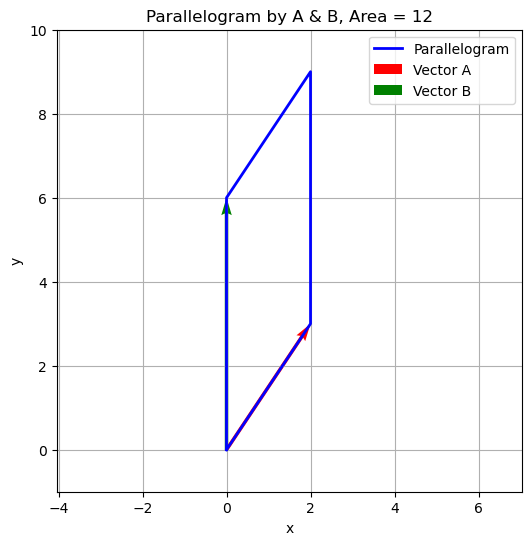

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 벡터 정의
A = np.array([2, 3])
B = np.array([0, 6])

# 평행사변형의 꼭짓점 계산
O = np.array([0, 0])
P1 = A
P2 = B
P3 = A + B

# 꼭짓점 리스트
parallelogram = np.array([O, P1, P3, P2, O])  # 다시 O로 돌아와서 닫기

# 넓이 계산
area = abs(np.cross(A, B))

# 시각화
plt.figure(figsize=(6,6))
plt.plot(parallelogram[:,0], parallelogram[:,1], 'b-', linewidth=2, label='Parallelogram')
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
plt.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='g', label='Vector B')

# 설정
plt.grid(True)
plt.axis('equal')
plt.title(f"Parallelogram by A & B, Area = {area}")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 4)
plt.ylim(-1, 10)
plt.show()


In [32]:
from sympy import Matrix
A,B=Matrix([2,3]),Matrix([0,6])
BA=(A.dot(B))/(B.dot(B))*B
BA

Matrix([
[0],
[3]])

In [33]:
# 높이 벡터 h
h=A-BA
h.norm() # 높이 계산

2

## Jacobian의 이해

In [2]:
from sympy import symbols,integrate,sqrt

x=symbols('x')
2*integrate(sqrt(16-x**2),(x,-4,4))

16*pi

In [6]:
y=symbols('y')
integrate(1,(y,-sqrt(16-x**2),sqrt(16-x**2)))

2*sqrt(16 - x**2)

In [4]:
y=symbols('y')
integrate(integrate(1,(y,-sqrt(16-x**2),sqrt(16-x**2))),(x,-4,4))

16*pi